# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Nurul Khotimah]
- **Email:** [nurulkhot2@gmail.com]
- **ID Dicoding:** [NURUL KHOTIMAH]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren temperatur/suhu perbulan di Gucheng pada tahun 2014?
- Kapan Changping mengalami suhu/temperatur tertinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
temp_df = pd.read_csv("D:\SEMESTER 7\GITHUB CLONE\dicoding_dataset_latihan\submission\data\PRSA_Data_20130301-20170228\PRSA_Data_Gucheng_20130301-20170228.csv")
temp_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


**Insight:**
- data berisi informasi waktu dan jenis polusi, temperatur, dan sebagainya
- tabel tersebut menampilkan 5 baris pertama dari data

### Assessing Data

## Menilai tabel temp_df

In [3]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [4]:
temp_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [5]:
print("Jumlah duplikasi: ", temp_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
temp_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


**Insight:**
- Terdapat perbedaan tipe data untuk masing-masing kolom, namun tidak terdapat masalah
- Terdapat perbedaan jumlah data pada setiap kolom menunjukkan adanya missing values pada kolom PM2.5 ke bawah hingga kolom WSPM.
- terdapat banyak data yang memiliki misssing value, namun tidak ada data yang terduplikasi
- jika dilihat dari data temperatur tidak terdapat keanehan pada valuenya

### Cleaning Data

Missing values

In [7]:
temp_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

### Mengisi missing value pada RAIN 
##### Data yang dilakukan cleaning hanya kolom RAIN dan TEMP karena kedua kolom tersebut yang akan digunakan

In [8]:
temp_df[temp_df.RAIN.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16766,16767,2015,1,28,14,28.0,28.0,17.0,46.0,800.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,Gucheng
16810,16811,2015,1,30,10,15.0,28.0,25.0,37.0,900.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,Gucheng
16813,16814,2015,1,30,13,5.0,6.0,7.0,9.0,400.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,Gucheng
16874,16875,2015,2,2,2,101.0,129.0,35.0,82.0,2800.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Gucheng
16878,16879,2015,2,2,6,111.0,111.0,49.0,91.0,3000.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Gucheng
16909,16910,2015,2,3,13,134.0,134.0,41.0,54.0,1700.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,Gucheng
16930,16931,2015,2,4,10,8.0,15.0,14.0,26.0,600.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,Gucheng
16982,16983,2015,2,6,14,71.0,74.0,54.0,86.0,1500.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,Gucheng
17007,17008,2015,2,7,15,10.0,10.0,10.0,16.0,400.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,Gucheng
17013,17014,2015,2,7,21,8.0,21.0,6.0,22.0,400.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,Gucheng


In [9]:
temp_df.RAIN.value_counts()

RAIN
0.0     33673
0.1       281
0.2       151
0.3       132
0.6        77
        ...  
13.0        1
7.6         1
14.7        1
36.6        1
10.1        1
Name: count, Length: 125, dtype: int64

### Mengganti nilai NaN hanya pada kolom 'RAIN' menjadi 0

In [10]:
temp_df['RAIN'].fillna(value=0, inplace=True)


In [11]:
temp_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN          0
wd          159
WSPM         42
station       0
dtype: int64

## Missing value pada TEMP

In [12]:
temp_df[temp_df.TEMP.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3960,3961,2013,8,13,0,94.0,95.0,3.0,40.0,1100.0,59.0,NaN,NaN,NaN,0.0,NaN,NaN,Gucheng
3961,3962,2013,8,13,1,98.0,95.0,3.0,24.0,1000.0,72.0,NaN,NaN,NaN,0.0,NaN,0.2,Gucheng
3962,3963,2013,8,13,2,96.0,103.0,3.0,31.0,1100.0,52.0,NaN,NaN,NaN,0.0,NaN,NaN,Gucheng
3963,3964,2013,8,13,3,106.0,112.0,3.0,41.0,1100.0,36.0,NaN,NaN,NaN,0.0,NaN,NaN,Gucheng
3964,3965,2013,8,13,4,97.0,101.0,3.0,48.0,1000.0,22.0,NaN,NaN,NaN,0.0,NaN,0.1,Gucheng
3965,3966,2013,8,13,5,85.0,101.0,3.0,26.0,1000.0,34.0,NaN,NaN,NaN,0.0,NaN,NaN,Gucheng
3966,3967,2013,8,13,6,91.0,75.0,3.0,28.0,1100.0,27.0,NaN,NaN,NaN,0.0,NaN,NaN,Gucheng
14903,14904,2014,11,11,23,7.0,177.0,4.0,5.0,200.0,70.0,NaN,1016.0,NaN,0.0,W,4.4,Gucheng
16766,16767,2015,1,28,14,28.0,28.0,17.0,46.0,800.0,33.0,NaN,NaN,NaN,0.0,NaN,NaN,Gucheng
16810,16811,2015,1,30,10,15.0,28.0,25.0,37.0,900.0,35.0,NaN,NaN,NaN,0.0,NaN,NaN,Gucheng


In [13]:
temp_df.TEMP.value_counts()

TEMP
 3.000000    283
 2.000000    226
 1.000000    197
 0.000000    191
-1.000000    170
            ... 
 7.080000      1
 8.650000      1
 9.180000      1
 9.620000      1
-1.466667      1
Name: count, Length: 995, dtype: int64

### Mengganti nilai NaN hanya pada kolom 'TEMP' menjadi 0

In [14]:

temp_df['TEMP'].fillna(value=3.000000, inplace=True)

In [15]:
temp_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP          0
PRES         50
DEWP         51
RAIN          0
wd          159
WSPM         42
station       0
dtype: int64

**Insight:**
- Terdapat banyak missing value pada data
- Data TEMP dan RAIN yang terdapat missing value diisi menggunakan nilai yang jumlahnya paling banyak, yakni 0 untuk RAIN dan 3.00000 untuk TEMP

## Exploratory Data Analysis (EDA)

### Explore temp_df

In [16]:
temp_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
29940,29941,2016,7,30,12,195.0,233.0,2.0,37.0,2000.0,46.0,27.3,1000.9,25.7,0.0,NNW,1.2,Gucheng
5383,5384,2013,10,11,7,32.0,79.0,3.0,54.0,800.0,1.0,12.4,1009.4,5.5,0.0,N,0.1,Gucheng
22328,22329,2015,9,17,8,120.0,140.0,2.0,38.0,1100.0,25.0,18.7,1010.8,16.3,0.0,NW,0.2,Gucheng
2547,2548,2013,6,15,3,81.0,158.0,25.0,108.0,1700.0,46.0,20.9,1000.0,14.8,0.0,N,0.1,Gucheng
7950,7951,2014,1,26,6,20.0,39.0,20.0,20.0,600.0,56.0,-2.1,1025.5,-8.6,0.0,SW,1.3,Gucheng


In [17]:
temp_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35064.000000,35014.000000,35013.000000,35064.000000,34905,35022.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Gucheng
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3949,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.848722,1008.829592,2.610442,0.064374,NaN,1.343310,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292235,10.103256,13.782991,0.838142,NaN,1.151064,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,NaN,0.600000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,NaN,1.000000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,NaN,1.800000,NaN


**Insight:**
- Berdasarkan rangkuman statistik, data temperatur memiliki suhu dari -15.600000 hingga 41.600000, dengan suhu rata-rata 13.848722 dan rain dengan hujan rata-rata 0.064374, dengan nilai dari 0 hingga 41.900000.

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana tren temperatur/suhu perbulan di Gucheng pada tahun 2014?

## Explore data temperatur

In [18]:
temp_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
23424,23425,2015,11,2,0,96.0,154.0,4.0,72.0,2100.0,2.0,4.8,1013.6,1.3,0.0,SSW,0.4,Gucheng
33420,33421,2016,12,22,12,11.0,11.0,2.0,12.0,300.0,51.0,5.3,1015.0,-13.7,0.0,N,4.2,Gucheng
29336,29337,2016,7,5,8,115.0,169.0,5.0,58.0,1000.0,41.0,25.7,1004.1,19.8,0.0,ENE,1.2,Gucheng
14861,14862,2014,11,10,5,60.0,60.0,9.0,56.0,3400.0,4.0,0.6,1018.0,-3.0,0.0,N,0.5,Gucheng
28719,28720,2016,6,9,15,82.0,120.0,11.0,18.0,800.0,250.0,33.1,994.5,13.2,0.0,SSW,5.1,Gucheng


## menampilkan diagram garis tren suhu selama 1 tahun 

#### filter data hanya tahun 2014

In [19]:
temp_2014 = temp_df[temp_df['year'] == 2014]

In [20]:
# Menghitung rata-rata temperatur per bulan untuk tahun 2014
temp_2014_avg = temp_2014.groupby('month')['TEMP'].mean()

Text(0, 0.5, 'Temperature')

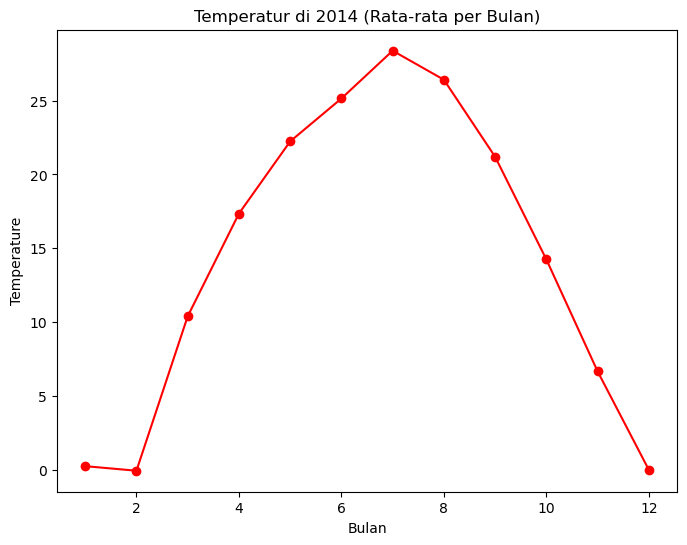

In [21]:
# Membuat plot garis dengan rata-rata temperatur per bulan
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(temp_2014_avg.index, temp_2014_avg.values, marker='o', color='red')
ax.set_title('Temperatur di 2014 (Rata-rata per Bulan)')
ax.set_xlabel('Bulan')
ax.set_ylabel('Temperature')

#### Hasil menunjukkan bahwa suhu tertinggi terjadi pada bulan 7 dan suhu terendah pada bulan 2

### Pertanyaan 2: Bagaimana korelasi temperatur dengan hujan?

In [22]:
temp_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16900,16901,2015,2,3,4,180.0,180.0,23.0,79.0,2000.0,4.0,-4.0,1024.0,-7.4,0.0,WNW,0.9,Gucheng
24773,24774,2015,12,28,5,98.0,98.0,21.0,64.0,2300.0,2.0,-8.8,1028.0,-11.0,0.0,NW,0.0,Gucheng
11741,11742,2014,7,3,5,170.0,170.0,2.0,55.0,1300.0,12.0,24.0,994.1,23.5,0.0,WSW,0.1,Gucheng
5243,5244,2013,10,5,11,295.0,250.0,24.0,67.0,2200.0,63.0,21.1,1012.5,13.0,0.0,ENE,1.2,Gucheng
11135,11136,2014,6,7,23,27.0,67.0,2.0,86.0,700.0,18.0,20.2,995.5,13.2,0.0,WSW,0.7,Gucheng


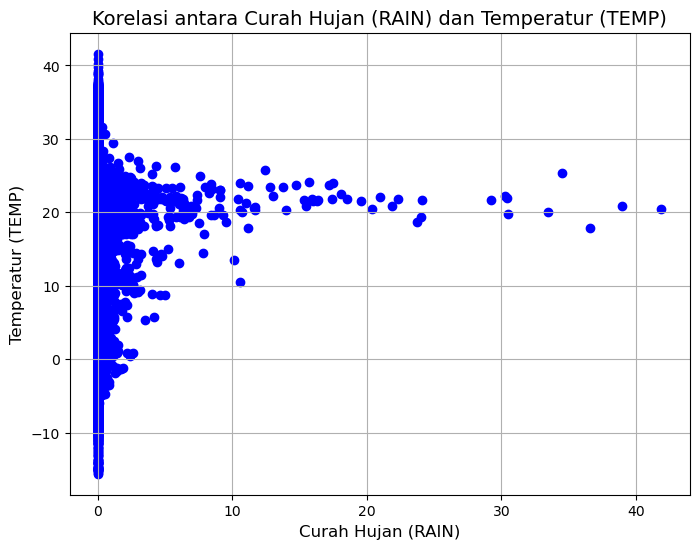

In [23]:
# Membuat scatter plot untuk hubungan antara curah hujan (RAIN) dan temperatur (TEMP)
plt.figure(figsize=(8, 6))  # Mengatur ukuran plot
plt.scatter(temp_df['RAIN'], temp_df['TEMP'], color='blue')  # Membuat scatter plot

# Menambahkan label dan judul
plt.title('Korelasi antara Curah Hujan (RAIN) dan Temperatur (TEMP)', fontsize=14)
plt.xlabel('Curah Hujan (RAIN)', fontsize=12)
plt.ylabel('Temperatur (TEMP)', fontsize=12)

# Menampilkan grid dan plot
plt.grid(True)
plt.show()

**Insight:**
- Data hujan menunjukkan variasi nilai yang sangat kecil sehingga nilai data hanya tersebar di antara nilai 0 sehingga hasil scatterplot menunjukkan korelasi yang rendah karena menjauhi garis 1:1 atau garis normal

## Analisis Lanjutan (Opsional) (Clustering)

#### Data suhu akan dibagi menjadi kategori suhu rendah sedang, dan tinggi

In [24]:
def categorize_temp(temp):
    if temp < 10:
        return 'Dingin'
    elif 10 <= temp <= 20:
        return 'Sedang'
    else:
        return 'Panas'

In [25]:
temp_df['Kategori_TEMP'] = temp_df['TEMP'].apply(categorize_temp)

In [26]:
print(temp_df[['TEMP', 'Kategori_TEMP']])

       TEMP Kategori_TEMP
0       0.1        Dingin
1      -0.3        Dingin
2      -0.7        Dingin
3      -1.0        Dingin
4      -1.3        Dingin
...     ...           ...
35059  12.8        Sedang
35060  11.1        Sedang
35061  10.5        Sedang
35062   8.9        Dingin
35063   6.2        Dingin

[35064 rows x 2 columns]


In [27]:
freq_counts = temp_df['Kategori_TEMP'].value_counts()

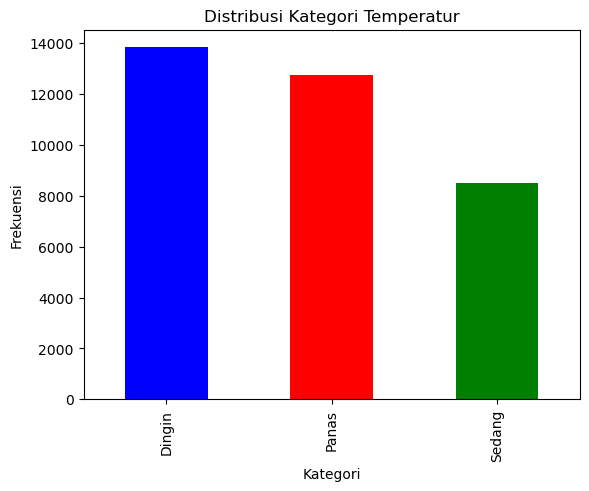

In [30]:
freq_counts.plot(kind='bar', color=['blue', 'red', 'green'])
plt.title('Distribusi Kategori Temperatur')
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')
plt.show()

#### area stasiun gucheng didominasi oleh suhu dingin, diikuti oleh suhu panas, dan paling sedikit suhu sedang

## Conclusion

- Berdasarkan hasil analisis, pada tahun 2014 suhu terendah berada di bulan februari, dan suhu tertinggi berada di bulan Juli.
- Berdasarkan hasil analisi, tidak ada korelasi antara curah hujan dan suhu, namun dapat terlihat berdasarkan scatterplot bahwa curah hujan cenderung mengelompok pada nilai sekitar 0 sehingga dapat dikatakan stasiun Gucheng memiliki curah hujan sangat rendah

In [29]:
temp_df.to_csv("all_data.csv", index=False)